In [2]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [3]:
#define number of training iterations
NUM_ITER = 10000
#define learning rate
lr = 0.05

<h2>Define your input data and expected labels</h2>

In [4]:
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
y = np.array([0, 1, 0, 1],np.float32)
y = np.reshape(y,[4,1])

<h2>Define placeholder and Variables</h2>

In [5]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[4,2],name='X')
Y = tf.placeholder(tf.float32,shape=[4,1],name='Y')
W1 = tf.Variable(tf.random_normal([2,2]),tf.float32,name='W1')
b1 = tf.Variable(tf.zeros([2]),tf.float32,name='b1')
W2 = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W2')
b2 = tf.Variable(tf.zeros([1]),tf.float32,name='b2')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [6]:
Z1 = tf.add(tf.matmul(X, W1), b1)
A1 = tf.nn.sigmoid(Z1)
Z2 = tf.add(tf.matmul(A1, W2), b2)
logits = Z2
labels = Y

cost = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

#compare the predicted labels with true labels
Y_hat = tf.round(tf.sigmoid(Z2))
correct_pred = tf.equal(Y,Y_hat)
#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h2>Define cost function</h2>

<h2>Execute training</h2>

In [12]:
#initialize tensorflow variables
init = tf.global_variables_initializer()

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for epoch in range(NUM_ITER):
        sess.run([optimizer],feed_dict = {X:x,Y:y})
        #correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))
        #accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        #print(sess.run(accuracy,feed_dict = {X:x,Y:y}))
        
        if(epoch % 100 == 0):
            acc = sess.run(accuracy,feed_dict={X:x,Y:y})
            print("step "+str(epoch)+", Accuracy= {:.3f}".format(acc))
    print("Input state: ")    
    print(sess.run(X,feed_dict = {X:x,Y:y}))
    print("Output state: ")
    print(sess.run(Y,feed_dict = {X:x,Y:y})) 
    #sess.close()
    W11 = np.squeeze(sess.run(W1))
    b11 = np.squeeze(sess.run(b1))
    W22 = np.squeeze(sess.run(W2))
    b22 = np.squeeze(sess.run(b2))
    #print(sess.run(Y_hat), feed_dict = {X:x, Y:y}) 
#sess.close()
    

step 0, Accuracy= 0.500
step 100, Accuracy= 0.500
step 200, Accuracy= 0.500
step 300, Accuracy= 0.500
step 400, Accuracy= 0.500
step 500, Accuracy= 0.500
step 600, Accuracy= 0.500
step 700, Accuracy= 0.750
step 800, Accuracy= 0.750
step 900, Accuracy= 0.750
step 1000, Accuracy= 0.750
step 1100, Accuracy= 0.750
step 1200, Accuracy= 0.750
step 1300, Accuracy= 0.750
step 1400, Accuracy= 0.750
step 1500, Accuracy= 1.000
step 1600, Accuracy= 1.000
step 1700, Accuracy= 1.000
step 1800, Accuracy= 1.000
step 1900, Accuracy= 1.000
step 2000, Accuracy= 1.000
step 2100, Accuracy= 1.000
step 2200, Accuracy= 1.000
step 2300, Accuracy= 1.000
step 2400, Accuracy= 1.000
step 2500, Accuracy= 1.000
step 2600, Accuracy= 1.000
step 2700, Accuracy= 1.000
step 2800, Accuracy= 1.000
step 2900, Accuracy= 1.000
step 3000, Accuracy= 1.000
step 3100, Accuracy= 1.000
step 3200, Accuracy= 1.000
step 3300, Accuracy= 1.000
step 3400, Accuracy= 1.000
step 3500, Accuracy= 1.000
step 3600, Accuracy= 1.000
step 3700, Ac

<h2>Plot</h2>

(2,)
(2,)


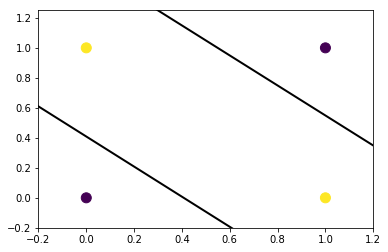

In [8]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
#b11 = np.reshape(b11,[2,])

plot_x1 = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y1 = 1 / W11[1,0] * (-W11[0,0] * plot_x1 - b11[0])
plot_y12 = 1 / W11[1,1] * (-W11[0,1] * plot_x1 - b11[1])

#plot_y1 = np.reshape(plot_y1,[2,-1])
#plot_y1 = np.squeeze(plot_y1)

#plot_y12 = np.reshape(plot_y12,[2,-1])
#plot_y12 = np.squeeze(plot_y12)

print(plot_x1.shape)
print(plot_y1.shape)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x1, plot_y1, color='k', linewidth=2)
plt.plot(plot_x1, plot_y12, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()